# Project: Used Turkish Cars - Whats important in used turkish cars?



## About the dataset



| ListingTitle           | ilanBasligi      | Title of the vehicle listing                      |
| ---------------------- | ---------------- | ------------------------------------------------- |
| District               | adres            | District or neighborhood of the listing)          |
| City                   | il               | City where the vehicle is located                 |
| Price(TRY)             | fiyat(TRY)       | Listed price of the vehicle in Turkish Lira       |
| ListingID              | ilanID           | Unique identifier of the listing                  |
| ListingDate            | ilanTarihi       | Date when the listing was posted                  |
| Brand                  | marka            | Brand of the vehicle                              |
| Series                 | seri             | Sub-series or model family                        |
| Model                  | model            | Specific model of the vehicle                     |
| Year                   | yıl              | Year of manufacture                               |
| Mileage(km)            | kilometre(Km)    | Total distance traveled (in kilometers)           |
| TransmissionType       | vitesTipi        | Type of transmission (automatic/manual            |
| FuelType               | yakitTuru        | Type of fuel used (e.g. petrol, diesel)           |
| BodyType               | kasaTipi         | Body style of the vehicle (e.g. sedan, hatchback) |
| Color                  | renk             | Exterior color of the vehicle                     |
| EngineSize(cc)         | motorHacmi(Cc)   | Engine volume/displacement in cubic centimeters   |
| EnginePower(HP)        | motorGucu(HP)    | Engine power in horsepower                        |
| DriveTrain             | cekisTipi        | Drivetrain type (e.g. FWD, RWD, AWD)              |
| PaintAndPartsCondition | boyaParcaDurumu  | Info on which parts are repainted or replaced     |
| TradeInAvailable       | takasUygunluk    | Whether the seller accepts trade-in               |
| SellerType             | saticiTuru       | Type of seller (individual, dealer)               |
| VehicleTax(TRY)        | aracVergisi(TRY) | Annual tax of the vehicle in TRY                  |
| AccidentHistory        | hasarGecmisi     | Any known accident histor                         |


## Missing Value Notes

Some rows contain missing values due to incomplete information provided by sellers. These mostly occur in columns like:

```
PaintAndPartsCondition
TradeInAvailable
SellerType
VehicleTax(TRY)
AccidentHistory
```

## Other uses for this dataset

```
Vehicle price prediction (regression)
NLP on listing titles
Feature importance analysis
Web scraping and data cleaning examples
```

# A. [Business Question]: Hypothesis

The bank suspects the at `age`, `balance`, and `geography` might be important factors that lead to a customer leaving the bank

## Download the dataset

In [1]:
!gdown 1kVQbJJAMCGJrFKe_1vql0bYLC0hlA2dL
!pip install case-converter plotly seaborn statsmodels

Downloading...
From: https://drive.google.com/uc?id=1kVQbJJAMCGJrFKe_1vql0bYLC0hlA2dL
To: /content/used_turkish_cars_en.csv
100% 3.40M/3.40M [00:00<00:00, 25.8MB/s]


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score


In [10]:

df = pd.read_csv("./used_turkish_cars_en.csv")
print("number of rows: {:,}".format(df.shape[0]))
print(df.head(1).transpose().to_markdown())



number of rows: 6,675
|                        | 0                                                                                                                                                                                                                                                                         |
|:-----------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ListingTitle           | 2016 AUDİ A3 SPORTBACK 1.0 TFSI BOYASIZ/DEĞİŞENSİZ/TRAMERSİZ____                                                                                                                                                                                                          |
| District               | Aşağısoku Mh. Merkez                                              

In [ ]:
df.head()

,ListingTitle,District,City,Price(TRY),ListingID,ListingDate,Brand,Series,Model,Year,...,BodyType,Color,EngineSize(cc),EnginePower(HP),DriveTrain,PaintAndPartsCondition,TradeInAvailable,SellerType,VehicleTax(TRY),AccidentHistory
0,2016 AUDİ A3 SPORTBACK 1.0 TFSI BOYASIZ/DEĞİŞE...,Aşağısoku Mh. Merkez,Bolu,1.169.000 TL,27812680,07 April 2025,Audi,A3,A3 Sportback 1.0 TFSI Dynamic,2016.0,...,Hatchback/5,White,1200 cm3' e kadar,101 - 125 HP,FWD,Original Right Rear Fender Trunk Lid Left R...,Trade-In Accepted,NaN,NaN,NaN
1,2018 AUDİ A6 2.0 TDI QUATTRO SUNROOF MATRİX VA...,Güneşevler Mh. Altındağ,Ankara,2.450.000 TL,28816234,07 April 2025,Audi,A6,A6 Sedan 2.0 TDI Quattro,2018.0,...,Sedan,Black,1968 cc,190 hp,AWD,Original Trunk Lid Right Rear Door Right Fr...,Trade-In Not Accepted,Dealer,NaN,Amount not specified
2,Sahibinden Audi A4 Sedan 1.8 TFSI 2011 Model,Burmalı Mh. Merkez,Afyonkarahisar,750.000 TL,28781662,08 April 2025,Audi,A4,A4 Sedan 1.8 TFSI,2011.0,...,Sedan,White,1798 cc,160 hp,FWD,Original Roof Left Front Door Hood Front B...,Trade-In Not Accepted,Private Seller,2.013,75.000
3,2016 AUDI A3 AMBİENTE *CAM TAVAN LED XENON HIZ...,Ilıca Mh. Manavgat,Antalya,1.195.000 TL,28731117,03 April 2025,Audi,A3,A3 Sportback 1.6 TDI Ambiente,2016.0,...,Hatchback/5,Black,1598 cc,110 hp,FWD,Original Right Rear Fender Trunk Lid Right ...,Trade-In Accepted,Dealer,1.606,No tram amount
4,Sahibinden Audi A3 Sportback 1.6 TDI S-Line 20...,Uğur Mumcu Mh. Yenimahalle,Ankara,822.000 TL,28393351,02 April 2025,Audi,A3,A3 Sportback 1.6 TDI Attraction,2012.0,...,Hatchback/5,White,1598 cc,105 hp,FWD,Original Right Rear Fender Trunk Lid Left R...,NaN,NaN,NaN,Amount not specified


#Linear Regression 1


In [11]:
#data cleaning

#price section
df["Price(TRY)"] = (
df["Price(TRY)"].astype(str)
.str.replace(r"[^\d]", "", regex=True)
.replace("", "0").astype(int)
)

#mileage
df["Mileage(km)"] = (
df["Mileage(km)"].astype(str)
.str.replace(r"[^\d]", "", regex=True)
.replace("", "0").astype(int)
)

#engine size
df["EngineSize(cc)"] = (
df["EngineSize(cc)"].astype(str).str.extract(r"(\d+)").astype(float).astype("Int64")
)

#engine power
engine_power = (
df["EnginePower(HP)"].astype(str).str.extractall(r"(\d+)").astype(float).groupby(level=0).mean()
)
df["EnginePower(HP)"] = engine_power.astype("Int64")

In [12]:
#feature engineering

if "ModelYear" in df.columns:
  df["CarAge"] = 2025 - df["ModelYear"]


# Price per Horsepower
if "EnginePower(HP)" in df.columns:
  df["Price_per_HP"] = df["Price(TRY)"] / (df["EnginePower(HP)"] + 1)


# Price per CC
if "EngineSize(cc)" in df.columns:
  df["Price_per_CC"] = df["Price(TRY)"] / (df["EngineSize(cc)"] + 1)


# Mileage per Year
if "CarAge" in df.columns:
  df["Mileage_per_Year"] = df["Mileage(km)"] / (df["CarAge"] + 1)

In [13]:
#categorical features
categorical_cols = ["Brand", "FuelType", "TransmissionType", "BodyType", "Color", "Series", "Model"]
df = pd.get_dummies(df, columns=[c for c in categorical_cols if c in df.columns], drop_first=True)

In [14]:
#features
X = df.drop(columns=["Price(TRY)", "ListingID", "ListingTitle", "ListingDate",
"District", "City", "PaintAndPartsCondition", "SellerType",
"AccidentHistory", "VehicleTax(TRY)"], errors="ignore")
y = df["Price(TRY)"]

In [15]:
X = X.dropna()
y = y.loc[X.index]

In [16]:
#converting non-numerical to dummies
non_numeric_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
#normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

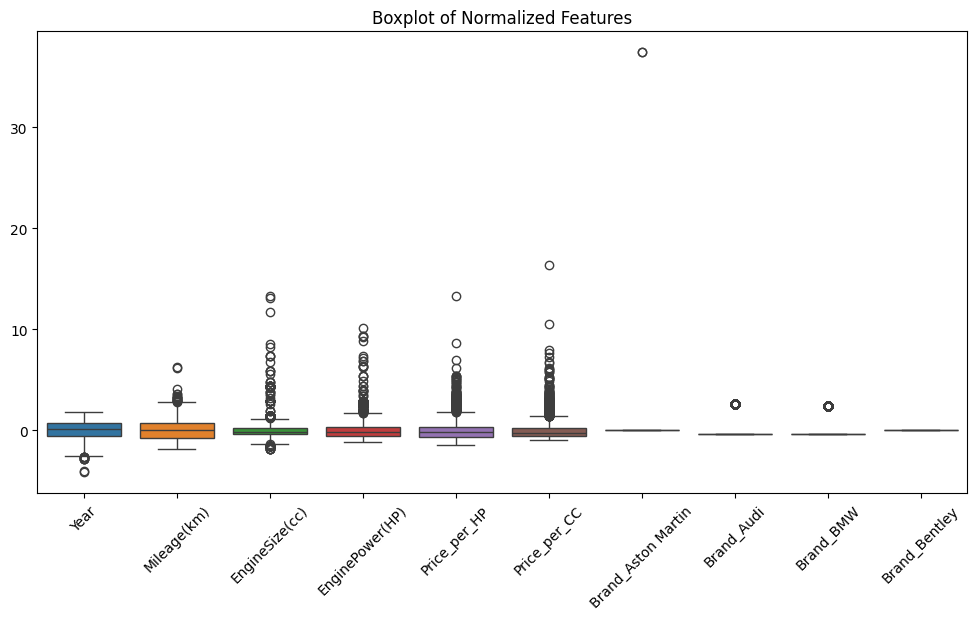

In [18]:
#visualisation
numeric_cols = X.columns
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)
plt.figure(figsize=(12,6))
sns.boxplot(data=X_scaled_df[numeric_cols[:10]])
plt.title('Boxplot of Normalized Features')
plt.xticks(rotation=45)
plt.show()

In [19]:
#test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
#linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 52744974772.43075
R^2 Score: 0.9592292021478129


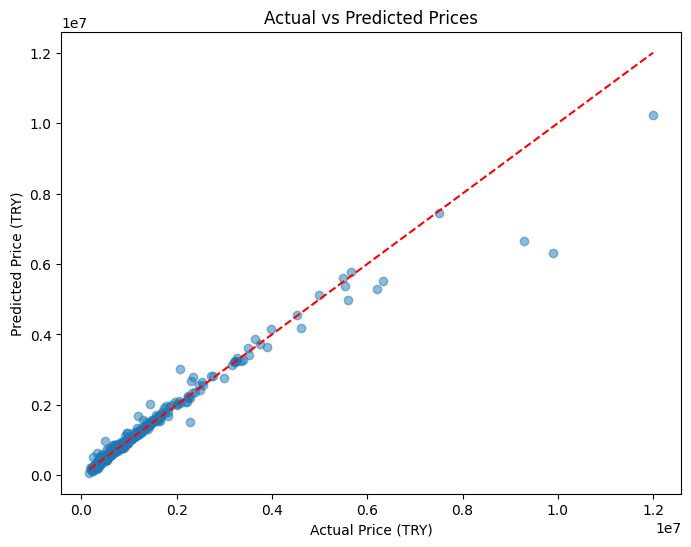

In [22]:
#results via visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price (TRY)')
plt.ylabel('Predicted Price (TRY)')
plt.title('Actual vs Predicted Prices')
plt.show()

2030     -8356.746237
1910   -211822.174920
3157     51791.743004
5472     15317.117762
3153      3174.736813
            ...      
1599     -1433.603843
4713    -18044.766955
6557    -63068.370006
845    -198046.895479
5206     -2102.942580
Name: Price(TRY), Length: 561, dtype: float64


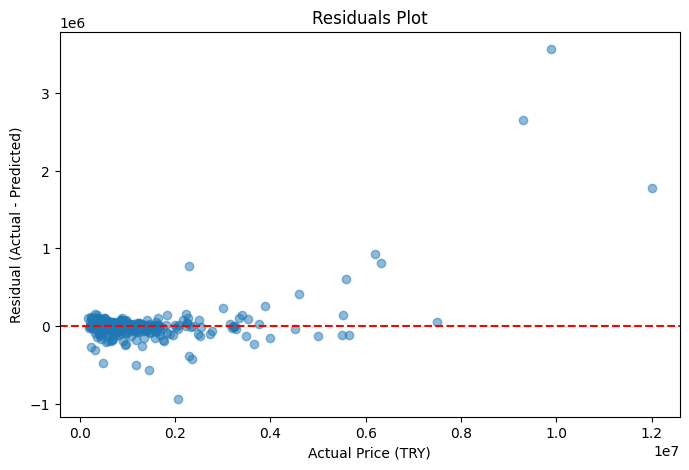

In [23]:
residuals = y_test - y_pred

print(residuals)

plt.figure(figsize=(8,5))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Price (TRY)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals Plot")
plt.show()


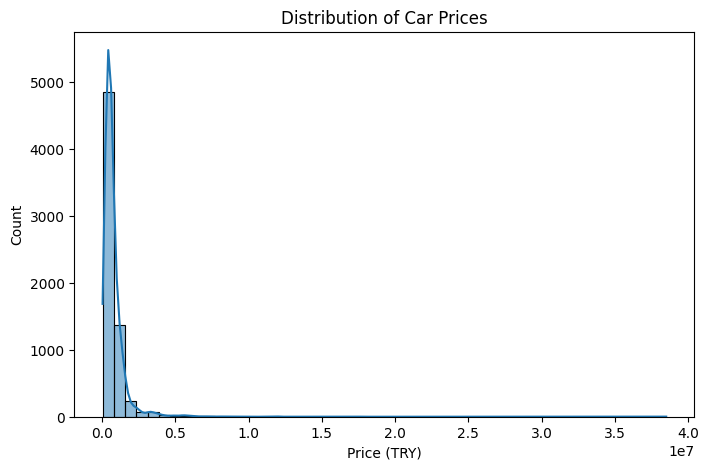

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price(TRY)"], bins=50, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price (TRY)")
plt.ylabel("Count")
plt.show()


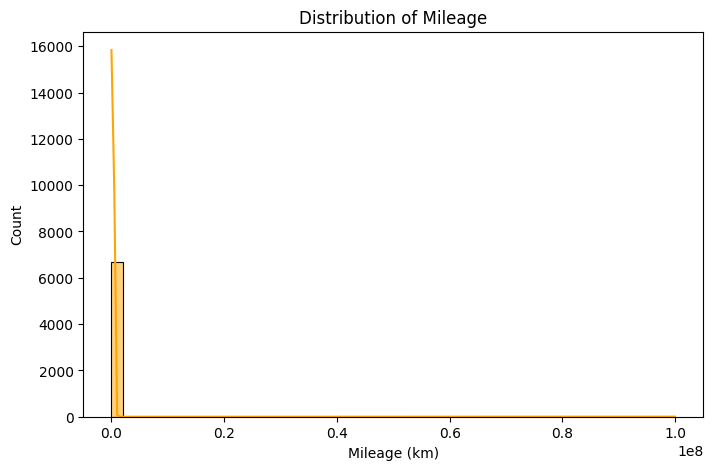

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df["Mileage(km)"], bins=50, kde=True, color="orange")
plt.title("Distribution of Mileage")
plt.xlabel("Mileage (km)")
plt.ylabel("Count")
plt.show()


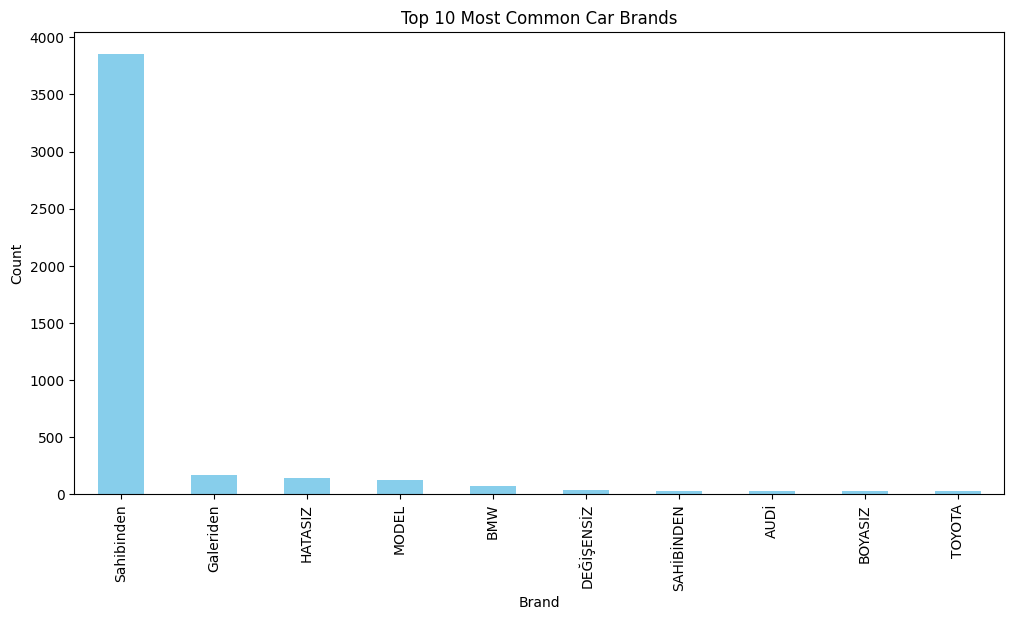

In [42]:
import re

# Remove years (any 4-digit number) from the title
df["CleanTitle"] = df["ListingTitle"].str.replace(r"\b\d{4}\b", "", regex=True)

# Extract the first word after cleaning
df["Brand"] = df["CleanTitle"].str.strip().str.split().str[0]

# Plot top 10 brands
plt.figure(figsize=(12,6))
df["Brand"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Common Car Brands")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()




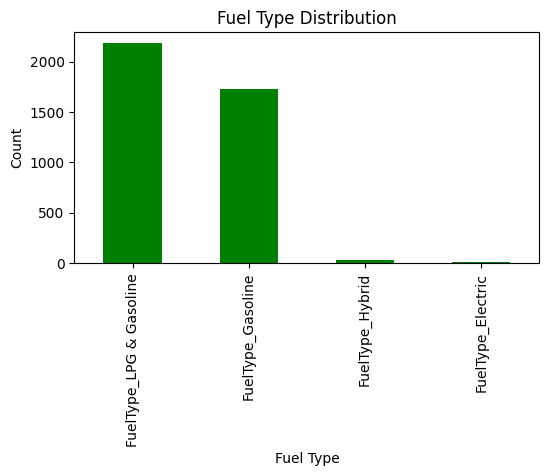

In [40]:
# Find columns that start with 'FuelType'
fuel_cols = [col for col in df.columns if "FuelType" in col]

# Sum counts across rows
fuel_counts = df[fuel_cols].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(6,3))
fuel_counts.plot(kind="bar", color="green")
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()


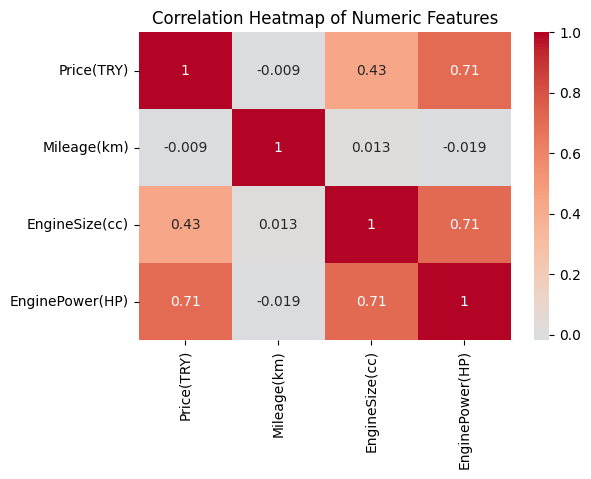

In [36]:
numeric_features = ["Price(TRY)", "Mileage(km)", "EngineSize(cc)", "EnginePower(HP)"]
corr = df[numeric_features].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()
